In [1]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import json

## Looking at netcdf data

In [2]:
ds_disk = xr.open_dataset("netcdf-files/netcdf_GLOB_rean_configs.nc")

In [3]:
ds_disk

<xarray.Dataset>
Dimensions:        (lat: 23, lon: 45, model: 8, months: 12, years: 39)
Coordinates:
  * lat            (lat) float32 -90.0 -81.82 -73.64 -65.45 ... 73.64 81.82 90.0
  * lon            (lon) float32 0.0 8.0 16.0 24.0 ... 328.0 336.0 344.0 352.0
Dimensions without coordinates: model, months, years
Data variables:
    fulldens       (model, lat, lon) float32 ...
    fullpres       (model, lat, lon) float32 ...
    fullwind       (model, lat, lon) float32 ...
    fullgen        (model, lat, lon) float32 ...
    fullace        (model, lat, lon) float32 ...
    fullpace       (model, lat, lon) float32 ...
    fulltcd        (model, lat, lon) float32 ...
    fulltrackbias  (model, lat, lon) float32 ...
    fullgenbias    (model, lat, lon) float32 ...
    fullacebias    (model, lat, lon) float32 ...
    fullpacebias   (model, lat, lon) float32 ...
    pm_count       (model, months) float32 ...
    pm_tcd         (model, months) float32 ...
    pm_ace         (model, months) float32 ...
    pm_pace        (model, months) float32 ...
    pm_lmi         (model, months) float32 ...
    py_count       (model, years) float32 ...
    py_tcd         (model, years) float32 ...
    py_ace         (model, years) float32 ...
    py_pace        (model, years) float32 ...
    py_latgen      (model, years) float32 ...
    py_lmi         (model, years) float32 ...
    tay_pc         (model) float32 ...
    tay_ratio      (model) float32 ...
    tay_bias       (model) float32 ...
    tay_xmean      (model) float32 ...
    tay_ymean      (model) float32 ...
    tay_xvar       (model) float32 ...
    tay_yvar       (model) float32 ...
    tay_rmse       (model) float32 ...
    tay_bias2      (model) float32 ...
    model_names    (model) |S16 ...
Attributes:
    description:            Coastal metrics processed data
    history:                Created 2021-01-22-16:04:33
    styr:                   1980
    enyr:                   2018
    stmon:                  1
    enmon:                  12
    basinstr:               GLOB
    do_special_filter_obs:  True
    do_fill_missing_pw:     True
    csvfilename:            rean_configs.csv
    truncate_years:         False
    do_defineMIbypres:      False
    gridsize:               8.0

In [21]:
year_list = [y for y in range(int(ds_disk.attrs["styr"]), int(ds_disk.attrs["enyr"])+1)]
print(dict.fromkeys(year_list, {}))

{1980: {}, 1981: {}, 1982: {}, 1983: {}, 1984: {}, 1985: {}, 1986: {}, 1987: {}, 1988: {}, 1989: {}, 1990: {}, 1991: {}, 1992: {}, 1993: {}, 1994: {}, 1995: {}, 1996: {}, 1997: {}, 1998: {}, 1999: {}, 2000: {}, 2001: {}, 2002: {}, 2003: {}, 2004: {}, 2005: {}, 2006: {}, 2007: {}, 2008: {}, 2009: {}, 2010: {}, 2011: {}, 2012: {}, 2013: {}, 2014: {}, 2015: {}, 2016: {}, 2017: {}, 2018: {}}


In [52]:
for key in ds_disk.data_vars:
    print(str(key) + ": ")
    print(ds_disk.data_vars[key].dims)

fulldens: 
('model', 'lat', 'lon')
fullpres: 
('model', 'lat', 'lon')
fullwind: 
('model', 'lat', 'lon')
fullgen: 
('model', 'lat', 'lon')
fullace: 
('model', 'lat', 'lon')
fullpace: 
('model', 'lat', 'lon')
fulltcd: 
('model', 'lat', 'lon')
fulltrackbias: 
('model', 'lat', 'lon')
fullgenbias: 
('model', 'lat', 'lon')
fullacebias: 
('model', 'lat', 'lon')
fullpacebias: 
('model', 'lat', 'lon')
pm_count: 
('model', 'months')
pm_tcd: 
('model', 'months')
pm_ace: 
('model', 'months')
pm_pace: 
('model', 'months')
pm_lmi: 
('model', 'months')
py_count: 
('model', 'years')
py_tcd: 
('model', 'years')
py_ace: 
('model', 'years')
py_pace: 
('model', 'years')
py_latgen: 
('model', 'years')
py_lmi: 
('model', 'years')
tay_pc: 
('model',)
tay_ratio: 
('model',)
tay_bias: 
('model',)
tay_xmean: 
('model',)
tay_ymean: 
('model',)
tay_xvar: 
('model',)
tay_yvar: 
('model',)
tay_rmse: 
('model',)
tay_bias2: 
('model',)
model_names: 
('model',)


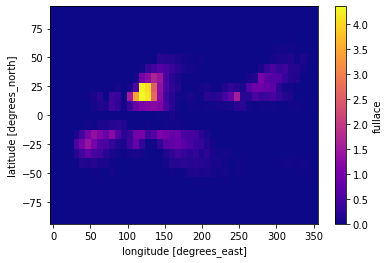

In [30]:
fullace = ds_disk["fullace"].isel(model=1)
fullace.plot(cmap="plasma")

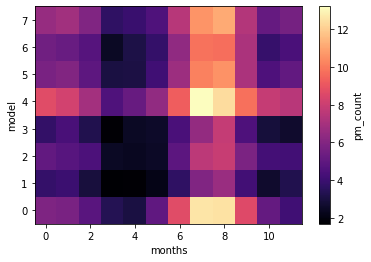

In [28]:
pm_count = ds_disk["pm_count"]
pm_count.plot(cmap="magma")

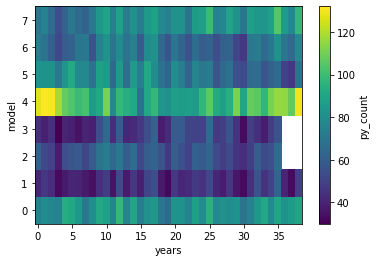

In [29]:
py_count = ds_disk["py_count"]
py_count.plot(cmap="viridis")

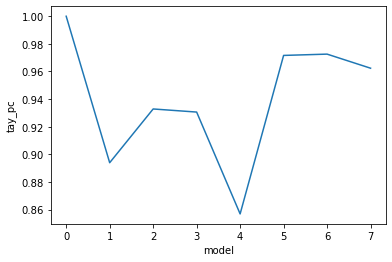

In [26]:
tay_pc = ds_disk["tay_pc"]
tay_pc.plot()

## Convert netcdf to json

### Yearly metrics

In [56]:
# Structure
# 'dims': ('model', 'years')
# RESULTS: {
#    model: {
#        metric: {
#            year 1: value,
#            year 2: value
#            }
#        }
#    }

In [4]:
metric_json = {"RESULTS": {}}
model_count = len(ds_disk["model"])
metric_list = ["py_count", "py_tcd", "py_ace", "py_pace", "py_latgen", "py_lmi"]

for model in range(0,model_count):
    model_name = str(ds_disk["model_names"][model].data.astype('U13'))
    metric_json["RESULTS"][model_name] = {}
    for metric in metric_list:
        metric_dict = ds_disk[metric].to_dict()["data"][model]
        metric_json["RESULTS"][model_name].update({metric: {}})
        for year,value in enumerate(metric_dict):
            metric_json["RESULTS"][model_name][metric].update({year: value})

In [106]:
print(json.dumps(metric_json, indent=2))

{
  "RESULTS": {
    "OBS": {
      "py_count": {
        "0": 74.0,
        "1": 79.0,
        "2": 77.0,
        "3": 75.0,
        "4": 93.0,
        "5": 91.0,
        "6": 84.0,
        "7": 71.0,
        "8": 80.0,
        "9": 91.0,
        "10": 88.0,
        "11": 76.0,
        "12": 98.0,
        "13": 76.0,
        "14": 90.0,
        "15": 73.0,
        "16": 81.0,
        "17": 84.0,
        "18": 70.0,
        "19": 64.0,
        "20": 82.0,
        "21": 82.0,
        "22": 75.0,
        "23": 87.0,
        "24": 80.0,
        "25": 95.0,
        "26": 78.0,
        "27": 81.0,
        "28": 80.0,
        "29": 82.0,
        "30": 69.0,
        "31": 75.0,
        "32": 84.0,
        "33": 91.0,
        "34": 79.0,
        "35": 90.0,
        "36": 82.0,
        "37": 86.0,
        "38": 90.0
      },
      "py_tcd": {
        "0": 340.25,
        "1": 353.75,
        "2": 394.0,
        "3": 336.25,
        "4": 456.75,
        "5": 451.25,
        "6": 450.0,
        "

### Monthly metrics

In [ ]:
# Structure
# 'dims': ('model', 'years')
# RESULTS: {
#    model: {
#        metric: {
#            month 1: value,
#            month 2: value
#            }
#        }
#    }

In [13]:
# initialize json fields
metric_json = {"DIMENSIONS": {"json_structure": ["model", "metric", "month"], "dimensions": {}}, "RESULTS": {}}
model_dict = {}
met_dict = {"pm_count": "count",
            "pm_tcd": "tropical cyclone days",
            "pm_ace": "accumulated cyclone energy", 
            "pm_pace": "",
            "pm_lmi": "lifetime maximum intensity"}
month_dict = {"1": "January",
              "2": "February",
              "3": "March",
              "4": "April",
              "5": "May",
              "6": "June",
              "7": "July",
              "8": "August",
              "9": "September",
              "10": "October",
              "11": "November",
              "12": "December"}

# get netcdf metrics into dictionaries
model_count = len(ds_disk["model"])
metric_list = ["pm_count", "pm_tcd", "pm_ace", "pm_pace", "pm_lmi"]

for model in range(0,model_count):
    model_name = str(ds_disk["model_names"][model].data.astype('U13'))
    metric_json["RESULTS"][model_name] = {}
    model_dict.update({model_name: {}})
    for metric in metric_list:
        metric_dict = ds_disk[metric].to_dict()["data"][model]
        metric_json["RESULTS"][model_name].update({metric: {}})
        for month,value in enumerate(metric_dict):
            metric_json["RESULTS"][model_name][metric].update({month+1: value})

# finalize json
metric_json["DIMENSIONS"]["dimensions"].update({"model": model_dict})
metric_json["DIMENSIONS"]["dimensions"].update({"metric": met_dict})
metric_json["DIMENSIONS"]["dimensions"].update({"month": month_dict})
print(json.dumps(metric_json, indent=2))

{
  "DIMENSIONS": {
    "json_structure": [
      "model",
      "metric",
      "month"
    ],
    "dimensions": {
      "model": {
        "OBS": {},
        "ERAI": {},
        "20CRv3": {},
        "MERRA": {},
        "MERRA2": {},
        "JRA": {},
        "CFSR": {},
        "ERA5": {}
      },
      "metric": {
        "pm_count": "count",
        "pm_tcd": "",
        "pm_ace": "",
        "pm_pace": "",
        "pm_lmi": ""
      },
      "month": {
        "1": "January",
        "2": "February",
        "3": "March",
        "4": "April",
        "5": "May",
        "6": "June",
        "7": "July",
        "8": "August",
        "9": "September",
        "10": "October",
        "11": "November",
        "12": "December"
      }
    }
  },
  "RESULTS": {
    "OBS": {
      "pm_count": {
        "1": 5.875,
        "2": 5.75,
        "3": 4.824999809265137,
        "4": 3.4000000953674316,
        "5": 3.049999952316284,
        "6": 5.025000095367432,
        "7": 8.67500

### Taylor metrics

In [ ]:
# Structure
# 'dims': ('model', 'years')
# RESULTS: {
#    model: {
#        metric1: value,
#        metric2: value
#        }
#    }

In [108]:
metric_json = {"RESULTS": {}}
model_count = len(ds_disk["model"])
metric_list = ["tay_pc", "tay_ratio", "tay_bias", "tay_xmean", "tay_ymean", "tay_xvar", "tay_yvar", "tay_rmse", "tay_bias2"]
for model in range(0,model_count):
    model_name = str(ds_disk["model_names"][model].data.astype('U13'))
    metric_json["RESULTS"][model_name] = {}
    for metric in metric_list:
        metric_dict = ds_disk[metric].to_dict()["data"][model]
        metric_json["RESULTS"][model_name].update({metric: metric_dict})

In [109]:
print(json.dumps(metric_json, indent=2))

{
  "RESULTS": {
    "OBS": {
      "tay_pc": 1.0,
      "tay_ratio": 1.0,
      "tay_bias": 0.0,
      "tay_xmean": 2.3655686378479004,
      "tay_ymean": 2.3655686378479004,
      "tay_xvar": 37.24189758300781,
      "tay_yvar": 37.24189758300781,
      "tay_rmse": 0.0,
      "tay_bias2": 0.0
    },
    "ERAI": {
      "tay_pc": 0.8939387202262878,
      "tay_ratio": 0.6866740584373474,
      "tay_bias": -35.91099548339844,
      "tay_xmean": 1.5160694122314453,
      "tay_ymean": 2.3655686378479004,
      "tay_xvar": 17.560344696044922,
      "tay_yvar": 37.24189758300781,
      "tay_rmse": 0.5130395293235779,
      "tay_bias2": -46.027374267578125
    },
    "20CRv3": {
      "tay_pc": 0.9328495264053345,
      "tay_ratio": 0.9259523749351501,
      "tay_bias": -8.618931770324707,
      "tay_xmean": 2.161681890487671,
      "tay_ymean": 2.3655686378479004,
      "tay_xvar": 31.93074607849121,
      "tay_yvar": 37.24189758300781,
      "tay_rmse": 0.3618778586387634,
      "tay_bias

## Looking at CSV data

In [48]:
import csv

def remove_key(d, key):
    new_dict = d.copy()
    new_dict.pop(key)
    return new_dict

def get_metrics(d):
    met = {}
    for key in d:
        met[key] = {}
    return met

def print_csv(fname):
    model_dict = {}
    with open(fname) as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            model_dict.update({row["Model"]: remove_key(row, "Model")})
    return model_dict

In [55]:
print_csv("csv-files/means_rean_configs_GLOB_climo_mean.csv")

{'OBS': {'sdy_count': '7.611109911362485',
  'sdy_tcd': '63.39171566841061',
  'sdy_ace': '122.5320201630012',
  'sdy_pace': '119.86952051327411',
  'sdy_lmi': '1.0176515392050824',
  'sdy_latgen': '0.9154596558015696'}}

In [50]:
print_csv("csv-files/metrics_rean_configs_GLOB_climo_mean.csv")

{'OBS': {'uclim_count': '79.575',
  'uclim_tcd': '404.1375',
  'uclim_ace': '628.4836314949674',
  'uclim_pace': '612.7818828366887',
  'uclim_lmi': '19.696388752691487'},
 'ERAI': {'uclim_count': '42.94871794871795',
  'uclim_tcd': '259.97435897435895',
  'uclim_ace': '107.66026436951277',
  'uclim_pace': '191.52678383052952',
  'uclim_lmi': '23.441560020520463'},
 '20CRv3': {'uclim_count': '56.416666666666664',
  'uclim_tcd': '364.90972222222223',
  'uclim_ace': '220.13475982436682',
  'uclim_pace': '358.9038713648375',
  'uclim_lmi': '19.701331423017358'},
 'MERRA': {'uclim_count': '47.08333333333333',
  'uclim_tcd': '269.80555555555554',
  'uclim_ace': '104.55264707871223',
  'uclim_pace': '205.12159850608091',
  'uclim_lmi': '24.815427121236937'},
 'MERRA2': {'uclim_count': '100.10256410256409',
  'uclim_tcd': '607.0961538461538',
  'uclim_ace': '290.5558906356323',
  'uclim_pace': '449.40456067309617',
  'uclim_lmi': '18.472293210525347'},
 'JRA': {'uclim_count': '71.230769230769

In [51]:
print_csv("csv-files/metrics_rean_configs_GLOB_spatial_corr.csv")

{'OBS': {'rxy_track': '0.9999999999999999',
  'rxy_gen': '1.0000000000000002',
  'rxy_u10': '1.0',
  'rxy_slp': '1.0',
  'rxy_ace': '1.0000000000000002',
  'rxy_pace': '1.0000000000000002'},
 'ERAI': {'rxy_track': '0.8939387224671504',
  'rxy_gen': '0.8555519533996152',
  'rxy_u10': '0.39495706984895057',
  'rxy_slp': '0.22915714040264426',
  'rxy_ace': '0.8253809503163918',
  'rxy_pace': '0.9158117515411679'},
 '20CRv3': {'rxy_track': '0.9328495058583917',
  'rxy_gen': '0.9013848269428867',
  'rxy_u10': '0.7910614707009612',
  'rxy_slp': '0.8262008400424622',
  'rxy_ace': '0.9004459111053565',
  'rxy_pace': '0.9676218902333104'},
 'MERRA': {'rxy_track': '0.9306093201356158',
  'rxy_gen': '0.8892089204422425',
  'rxy_u10': '0.2000570022195703',
  'rxy_slp': '0.061259619648793645',
  'rxy_ace': '0.8460457623594061',
  'rxy_pace': '0.9254559395752533'},
 'MERRA2': {'rxy_track': '0.8568490468908728',
  'rxy_gen': '0.7745164768110718',
  'rxy_u10': '0.6135948443824304',
  'rxy_slp': '0.413

In [52]:
print_csv("csv-files/metrics_rean_configs_GLOB_storm_mean.csv")

{'OBS': {'utc_tcd': '5.078699340245052',
  'utc_ace': '7.898003537479956',
  'utc_pace': '7.700683416106677',
  'utc_latgen': '16.00946905435124',
  'utc_lmi': '19.69426641533145'},
 'ERAI': {'utc_tcd': '6.053134328358209',
  'utc_ace': '2.506716603230447',
  'utc_pace': '4.45942959366606',
  'utc_latgen': '16.33324829910448',
  'utc_lmi': '23.47353030029851'},
 '20CRv3': {'utc_tcd': '6.468119153126539',
  'utc_ace': '3.901945521259087',
  'utc_pace': '6.361663894206869',
  'utc_latgen': '14.607090103397342',
  'utc_lmi': '19.699655342195964'},
 'MERRA': {'utc_tcd': '5.730383480825958',
  'utc_ace': '2.220587194592118',
  'utc_pace': '4.356564924022957',
  'utc_latgen': '18.05693215339233',
  'utc_lmi': '24.847197640117994'},
 'MERRA2': {'utc_tcd': '6.064741290983607',
  'utc_ace': '2.902581899280138',
  'utc_pace': '4.489441051806033',
  'utc_latgen': '13.430584016393443',
  'utc_lmi': '18.324923155737704'},
 'JRA': {'utc_tcd': '6.670536357091433',
  'utc_ace': '3.5570542488736723',
 

In [53]:
print_csv("csv-files/metrics_rean_configs_GLOB_temporal_pcorr.csv")

{'OBS': {'rp_count': '1.0',
  'rp_tcd': '0.9999999999999997',
  'rp_ace': '1.0',
  'rp_pace': '1.0',
  'rp_lmi': '0.9999999999999998'},
 'ERAI': {'rp_count': '0.9292276424518996',
  'rp_tcd': '0.9347424093553853',
  'rp_ace': '0.9200033708989752',
  'rp_pace': '0.9569492865545794',
  'rp_lmi': '0.9241770587559766'},
 '20CRv3': {'rp_count': '0.9246239447355777',
  'rp_tcd': '0.930071135109295',
  'rp_ace': '0.9505912276595662',
  'rp_pace': '0.9658969911413842',
  'rp_lmi': '0.970074357157333'},
 'MERRA': {'rp_count': '0.9513868173182645',
  'rp_tcd': '0.9636758044920684',
  'rp_ace': '0.979404603394524',
  'rp_pace': '0.968803041165413',
  'rp_lmi': '0.7931677379165739'},
 'MERRA2': {'rp_count': '0.958873249050638',
  'rp_tcd': '0.9411635153459782',
  'rp_ace': '0.9639846972280695',
  'rp_pace': '0.9470143849040827',
  'rp_lmi': '0.9133997365147241'},
 'JRA': {'rp_count': '0.9761785252343763',
  'rp_tcd': '0.9680921112488117',
  'rp_ace': '0.9748436740246842',
  'rp_pace': '0.971364334

In [54]:
print_csv("csv-files/metrics_rean_configs_GLOB_temporal_scorr.csv")

{'OBS': {'rs_count': '1.0',
  'rs_tcd': '1.0',
  'rs_ace': '1.0',
  'rs_pace': '1.0',
  'rs_lmi': '1.0'},
 'ERAI': {'rs_count': '0.8741258741258742',
  'rs_tcd': '0.9370629370629372',
  'rs_ace': '0.9370629370629372',
  'rs_pace': '0.9510489510489512',
  'rs_lmi': '0.9160839160839163'},
 '20CRv3': {'rs_count': '0.9370629370629372',
  'rs_tcd': '0.965034965034965',
  'rs_ace': '0.965034965034965',
  'rs_pace': '0.9510489510489512',
  'rs_lmi': '0.9720279720279721'},
 'MERRA': {'rs_count': '0.9370629370629372',
  'rs_tcd': '0.9370629370629372',
  'rs_ace': '0.9860139860139862',
  'rs_pace': '0.965034965034965',
  'rs_lmi': '0.7342657342657343'},
 'MERRA2': {'rs_count': '0.9580419580419581',
  'rs_tcd': '0.9510489510489512',
  'rs_ace': '0.9580419580419581',
  'rs_pace': '0.9440559440559443',
  'rs_lmi': '0.9160839160839163'},
 'JRA': {'rs_count': '0.9090909090909092',
  'rs_tcd': '0.9860139860139862',
  'rs_ace': '0.9790209790209792',
  'rs_pace': '0.965034965034965',
  'rs_lmi': '0.8111